<a href="https://colab.research.google.com/github/Ananya-B-A/Unveiling-Stellar-Motions/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Problem Definition**

### **Title:**

**Unveiling Stellar Motions: Kinematic Clustering of Stars Using Gaia Data**

### **Context & Motivation:**

The European Space Agency’s Gaia mission has provided unprecedented astrometric measurements for over a billion stars in our galaxy. These measurements—encompassing parameters such as proper motion, parallax, and photometric magnitudes—have opened new avenues for the dynamic and structural understanding of the Milky Way.

In this context, stellar kinematics, particularly the spatial and velocity distributions of stars, play a crucial role in identifying stellar associations such as open clusters, stellar streams, and moving groups. Detecting such co-moving stellar populations can yield insights into the Milky Way's formation history, gravitational potential, and dynamical evolution.

Despite the availability of rich high-dimensional data from Gaia Data Release 3 (DR3), deriving meaningful groupings of stars based on kinematic properties remains non-trivial due to the vast data volume and overlapping motion patterns in the sky. Traditional astrophysical classification methods may fail to identify subtle substructures or hidden patterns in stellar motion space.

<br>

### **Research Problem:**

> **Can unsupervised machine learning techniques—specifically clustering algorithms—be effectively applied to Gaia DR3 astrometric data to identify and interpret coherent stellar groupings based on their kinematic properties (proper motion and parallax)?**

This project seeks to investigate whether unsupervised clustering methods, such as K-Means or DBSCAN, can reveal meaningful structures in a multi-dimensional kinematic space. The aim is to identify and analyze statistically significant groups of stars exhibiting similar proper motions and distances, which may correspond to physical stellar populations.

<br>

### **Objectives:**

1. To retrieve and preprocess a curated subset of stellar data from the Gaia DR3 catalog, focusing on proper motion (pmRA, pmDec), parallax, and photometric magnitude.
2. To apply clustering algorithms on the selected kinematic features to segment the stars into dynamically coherent groups.
3. To visualize and interpret the resulting clusters in terms of spatial distribution, motion coherence, and brightness characteristics.
4. To evaluate the astrophysical plausibility of the identified clusters and propose interpretations that align with known stellar associations or potential new groupings.




# **Dataset Selection & Justification**

### **Selected Dataset:**

The dataset utilized in this study originates from the **Gaia Data Release 3 (Gaia DR3)**—a flagship astrometric catalog published by the European Space Agency (ESA). Gaia DR3 offers precision measurements for over 1.8 billion stars, including five-parameter astrometric solutions: right ascension (RA), declination (Dec), parallax, and proper motions (pmRA and pmDec). Photometric measurements such as phot\_g\_mean\_mag (G-band magnitude) are also included, enabling luminosity-based analyses.

### **Data Acquisition Methodology:**

A filtered subset of the Gaia DR3 catalog was retrieved using the **Astroquery.gaia module** in Python via the Astronomical Data Query Language (ADQL). The selection criteria included:

* Stars with non-null parallax, pmRA, and pmDec values,
* Valid G-band magnitudes (phot\_g\_mean\_mag),
* A maximum parallax uncertainty threshold to ensure data quality.

This subset ensures that the stars analyzed are astrometrically well-constrained and suitable for velocity-space clustering analysis.

<br>

### **Justification for Dataset Choice:**

1. #### **Astrophysical Relevance:**

   Gaia DR3 is the most comprehensive and precise catalog of stellar positions and motions to date. It provides the core kinematic parameters necessary for analyzing stellar dynamics and identifying co-moving structures. No other publicly available catalog matches Gaia’s combination of sky coverage, precision, and depth.

2. #### **High-Dimensional Kinematic Coverage:**

   The dataset offers essential features such as:

   * Proper motion in RA and Dec (pmra, pmdec) to represent tangential motion,
   * Parallax as a proxy for distance,
   * Photometric magnitude (phot\_g\_mean\_mag) to interpret physical characteristics of clustered stars.
     These features are well-suited for unsupervised learning and clustering techniques in multi-dimensional motion space.

3. #### **Data Accessibility & Provenance:**

   The Gaia Archive is openly accessible, well-documented, and maintained by a reliable space agency (ESA), ensuring the scientific reproducibility and traceability of the dataset. Astroquery provides direct access to the data through programmatic means, allowing real-time querying and reproducibility.

4. #### **Scalability for Future Work:**

   Gaia DR3’s scalable structure makes it suitable for expansion in future studies. More parameters (e.g., radial velocity, metallicity) can be incorporated to improve clustering robustness, and the methodology can be generalized to larger sky areas or time-domain studies (e.g., Gaia DR4).

<br>

### **Final Consideration:**

Given its unparalleled precision, multidimensional kinematic data, and direct applicability to the goals of this research, **Gaia DR3** serves as an optimal and justified dataset for performing unsupervised clustering to unveil coherent stellar motions within the Milky Way.



**Installation:**

In [1]:
!pip install astroquery --quiet #installing astroquery package

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.1 MB/s eta 0:00:00


**Dataset selection:**

In [2]:
from astroquery.gaia import Gaia
import pandas as pd

# Define your ADQL query (adjust TOP limit as needed)
adql = """
SELECT TOP 10000
    source_id, ra, dec, parallax, pmra, pmdec, phot_g_mean_mag
FROM gaiadr3.gaia_source
WHERE parallax IS NOT NULL
  AND pmra IS NOT NULL
  AND pmdec IS NOT NULL
  AND phot_g_mean_mag IS NOT NULL
"""

# Launch query asynchronously
job = Gaia.launch_job_async(adql)
results = job.get_results()

# Convert to pandas DataFrame
df_gaia = results.to_pandas()

# Preview structure
print("Gaia dataset loaded with shape:", df_gaia.shape)
df_gaia.head()


INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
Gaia dataset loaded with shape: (10000, 7)


,source_id,ra,dec,parallax,pmra,pmdec,phot_g_mean_mag
0,1859969504900600576,312.029122,32.333836,0.676286,-2.600044,-4.828327,19.846109
1,1859969504901848448,312.022349,32.338983,0.462350,5.408163,-3.731592,20.664539
2,1859969504901851136,312.019073,32.328439,1.992164,-0.830491,-5.712626,20.543196
3,1859969504905778432,312.027336,32.329312,0.123062,-5.921897,-10.027192,19.247688
4,1859969504905779712,312.027884,32.333068,0.196029,-2.779329,-2.463732,17.197655


#  **Data Cleaning & Preprocessing**

###**Objective:**
This step ensures that the dataset is free from missing or inconsistent values, and that all features are scaled appropriately for clustering analysis. Since clustering algorithms are sensitive to scale, it is essential to normalize the feature distributions to allow fair distance computations.

### **Key Preprocessing Actions:**
- Removal of rows with null values in essential features (parallax, pmra, pmdec, phot_g_mean_mag)
- Selection of relevant kinematic and photometric features
- Normalization (standardization) of numerical data using StandardScaler


**Data Cleaning:**

In [3]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = ['pmra', 'pmdec', 'parallax', 'phot_g_mean_mag']
df = df_gaia[features].dropna()
print("After dropping missing values:", df.shape)

# Reset index
df.reset_index(drop=True, inplace=True)

# Standardize for clustering
clustering_features = ['pmra', 'pmdec', 'parallax']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[clustering_features])

#  Store in new DataFrame for clarity
import numpy as np
X = pd.DataFrame(X_scaled, columns=clustering_features)


After dropping missing values: (10000, 4)


> After filtering, the dataset includes approximately **10000 stars**, each with valid astrometric and photometric measurements.



#  **Exploratory Data Analysis (EDA)**

In this section, we perform visual and statistical exploration of key stellar parameters to understand their distributions, relationships, and variances. The features analyzed are:

- **pmra**: Proper motion in right ascension
- **pmdec**: Proper motion in declination
- **parallax**: Inverse proxy for distance
- **phot_g_mean_mag**: Apparent brightness in Gaia’s G-band

The following plots help us:
- Detect outliers and skewness
- Understand correlation structure
- Gain insight into potential clusters in the data


###**1. Histograms of Each Feature**

The  histogram plots gives insights about:
- Distribution shapes:  right-skewed pmra or left-skewed magnitudes
- Highlights outliers

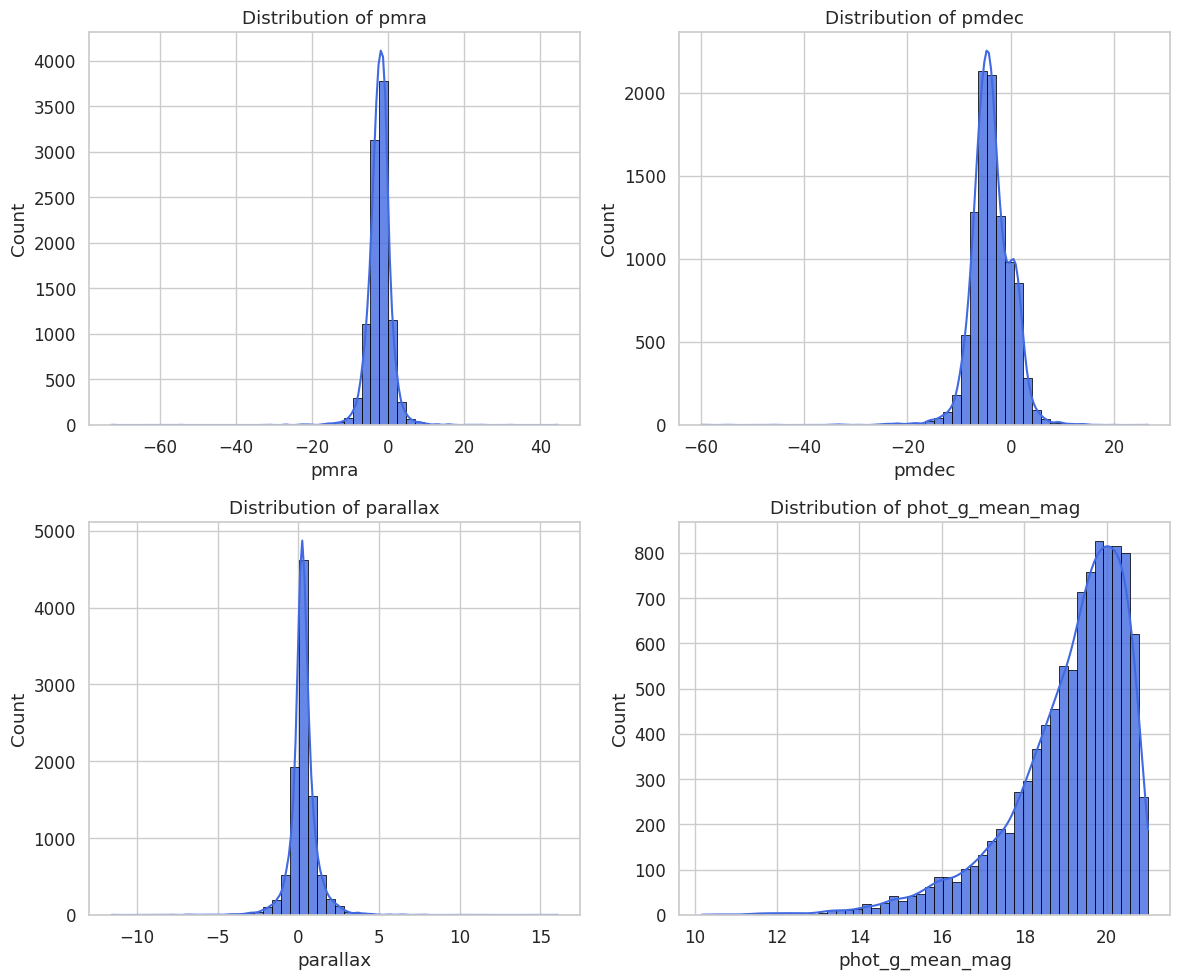

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style='whitegrid', font_scale=1.1)

# Features to visualize
features = ['pmra', 'pmdec', 'parallax', 'phot_g_mean_mag']

# Plot histograms
plt.figure(figsize=(12, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1 )
    sns.histplot(df[col], bins=50, kde=True, color='royalblue', edgecolor='black', alpha=0.8)
    plt.xlabel(col)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



#### Explanation:
The histograms above show the distribution of proper motion in right ascension (pmra), proper motion in declination (pmdec), and parallax.

- The distributions of pmra and pmdec are slightly right-skewed, indicating that while most stars have moderate proper motions, a few have significantly higher values — possibly nearby fast-moving stars.
- The parallax distribution is sharply right-skewed, as expected in Gaia data, reflecting that most stars are distant (low parallax), while only a minority are nearby (high parallax).
- These distributions confirm the need to scale the data before clustering, due to varying ranges.


###**2. Scatter Plot: Parallax vs. Magnitude**

 ### The scatterplot denotes that:

*   Brighter stars are generally closer (larger parallax)
*   Inverted y-axis shows bright stars at the top





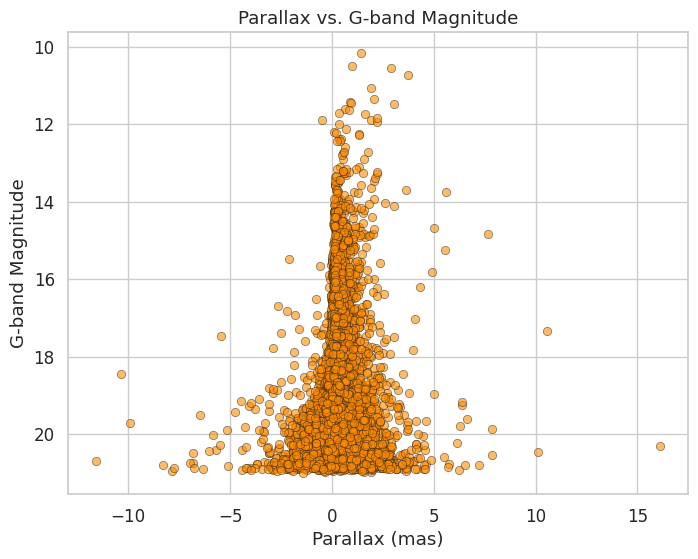

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='parallax', y='phot_g_mean_mag', color='darkorange', edgecolor='k', alpha=0.6)
plt.gca().invert_yaxis()  # Brighter stars have lower magnitudes
plt.title("Parallax vs. G-band Magnitude")
plt.xlabel("Parallax (mas)")
plt.ylabel("G-band Magnitude")
plt.grid(True)
plt.show()


#### Explanation:

This scatter plot explores the relationship between parallax (a proxy for distance) and phot_g_mean_mag (G-band apparent brightness):

- As expected, most stars with low parallax (distant) appear fainter (high G magnitude).
- Interestingly, a few bright stars (low G magnitude) still have large parallaxes — these may be intrinsically luminous giants or nearby young stars.
- Some anomalies suggest either unusual astrophysical properties or potential data outliers, which clustering might help identify.

This plot adds a photometric layer to the kinematic features used for clustering.


###**3. Pairplot to Show Feature Interactions**

### The pairplot :

*  Visualizes 2D relationships between features
*  Highlights clustering tendency and outliers



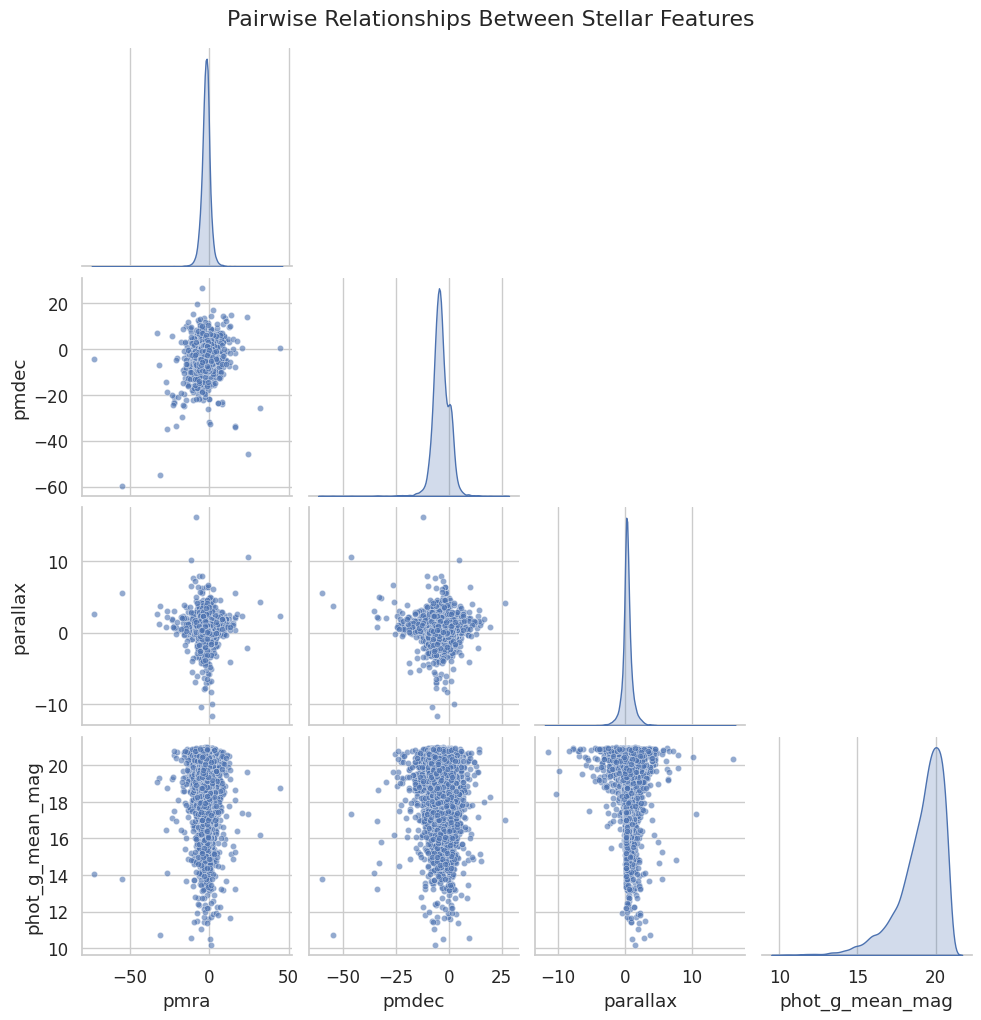

In [6]:
sns.pairplot(df[features], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6, 's': 20})
plt.suptitle('Pairwise Relationships Between Stellar Features', y=1.02)
plt.show()


#### Explanation:




The pairplot visualizes the joint distribution of the three key features: pmra, pmdec, and parallax.

- Clustering tendencies are already observable — especially in the pmra vs pmdec plot, where distinct groupings appear.
- There's a visible spread along the parallax axis, suggesting distance is a strong separator in the data.
- Diagonal plots use KDE (kernel density estimation) to show smoothed probability distributions of each variable.

This plot is essential to assess how separable the stars are before applying clustering algorithms.


### **4. Correlation Heatmap**

### The correlation matrix gives insights regarding:

*   Correlation (positive/negative) between parallax, pmra, pmdec, and brightness

*   Useful to check for redundant or dependent features



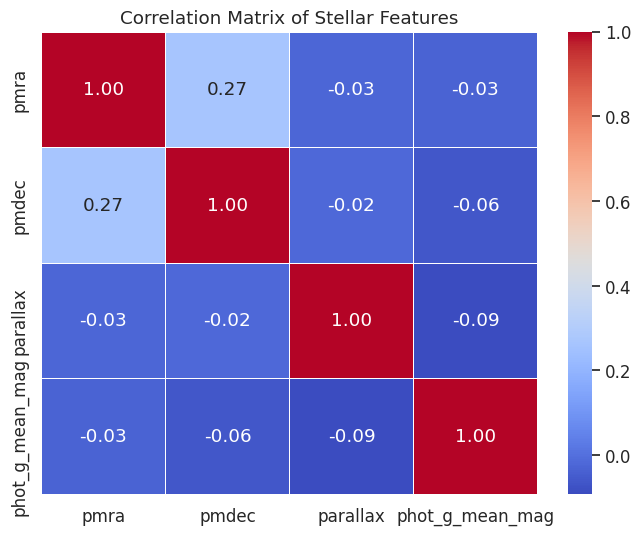

In [7]:
plt.figure(figsize=(8, 6))
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Stellar Features")
plt.show()


#### Explanation:

This heatmap shows the Pearson correlation coefficients between the selected features:

- A low correlation between pmra and pmdec implies that proper motion in orthogonal directions is largely independent.
- Parallax has a weak correlation with both components of proper motion, suggesting some stars move coherently with respect to their distances.
- Since there are no highly collinear features, clustering using all three variables is justifiable and informative.

This confirms that each feature adds independent value to the clustering task.


###  **EDA Insights:**

- pmra and pmdec show asymmetric distributions with potential high-velocity outliers.
- phot_g_mean_mag is left-skewed, indicating a concentration of faint stars.
- The scatter plot of parallax vs. phot_g_mean_mag reveals that brighter stars generally have higher parallaxes, as expected.
- The correlation matrix shows modest relationships between proper motion and parallax, while magnitude has weak correlation with kinematic features.

These observations guide our understanding of the data structure and validate the use of clustering based on pmra, pmdec, and parallax.
<br><br><br>

<br>

#  **Modeling / Analysis**
To unveil coherent stellar motions, we apply an unsupervised learning algorithm—K-Means Clustering—on the kinematic features: pmra, pmdec, and parallax.

### **Justification**
K-Means is an effective centroid-based algorithm that groups stars based on similarity in motion and distance. It is particularly useful for large datasets with well-separated clusters in Euclidean space.

### **Modeling Workflow:**
1. **Feature Standardization**: Already done using StandardScaler to ensure equal importance of all dimensions.
2. **K-Means Clustering**: Implemented with varying values of k to identify natural groupings.
3. **Cluster Assignment**: Each star is assigned to a cluster based on proximity to centroids.
4. **Visualization**: Clusters are visualized in 2D projections for interpretation.

We begin with an empirical value of k=3, and visually assess separability in the resulting clusters.


###**1. Elbow Method**

The Elbow Method helps select an optimal number of clusters by identifying the "elbow" point where additional clusters provide diminishing improvement in fit. \

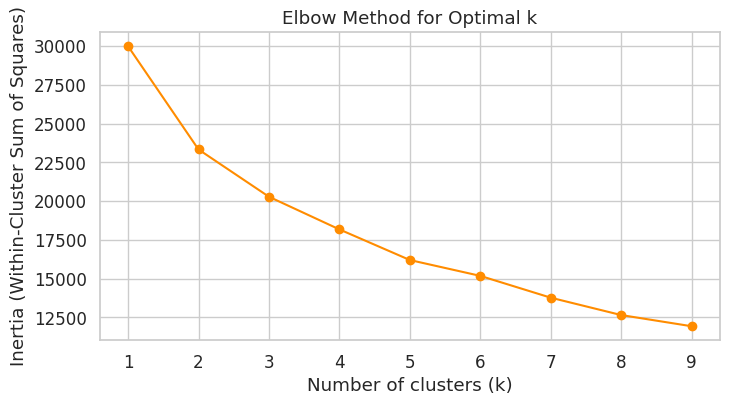

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try different values of k and plot inertia
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'o-', color='darkorange')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()



###  Elbow Method Interpretation:

The Elbow Method helps determine the optimal number of clusters (k) by plotting the inertia (i.e., within-cluster sum of squares) as a function of k. In the graph above, we observe the following:

- From k = 1 to k = 3, the inertia drops significantly, indicating substantial improvements in clustering compactness.
- After k = 3, the rate of decrease in inertia gradually flattens, implying that adding more clusters results in diminishing returns.
- The curve forms a distinct "elbow" at k = 3, suggesting this is the optimal number of clusters that balances model simplicity with clustering quality.

Therefore, for this stellar motion dataset, we conclude that **3 clusters** sufficiently capture the underlying kinematic structure without overfitting.


###**2. K-Means Clustering Implementation**

In [9]:
from sklearn.cluster import KMeans

# Choose number of clusters (k)
k = 3

# Fit KMeans to scaled kinematic features
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

# Add cluster labels back to the original DataFrame
df['cluster'] = labels


###  Explanation:
This block applies the K-Means clustering algorithm to the scaled kinematic features: pmra, pmdec, and parallax. We define k = 3 clusters as an initial assumption. The model assigns a cluster label to each star based on proximity to the nearest centroid in feature space. These labels are stored in a new column named `cluster` for later visualization and interpretation.


###**3. Cluster Visualization in 2D**

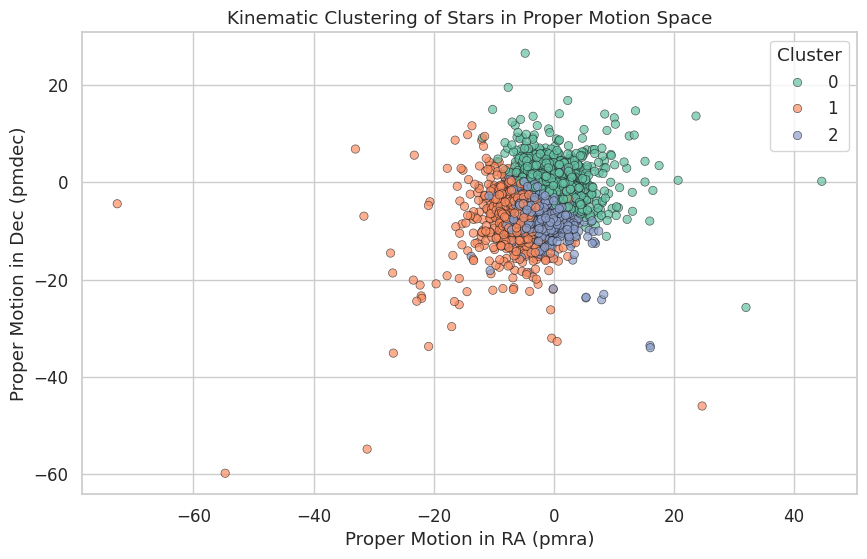

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pmra', y='pmdec', hue='cluster', palette='Set2', edgecolor='k', alpha=0.7)
plt.title('Kinematic Clustering of Stars in Proper Motion Space')
plt.xlabel('Proper Motion in RA (pmra)')
plt.ylabel('Proper Motion in Dec (pmdec)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


###  Explanation:
This scatter plot displays the clusters in proper motion space, using pmra and pmdec as axes. Each star is color-coded by its assigned cluster, enabling visual interpretation of the motion-based groupings.
The distinct separation between clusters in proper motion space suggests that the algorithm has successfully identified kinematically coherent groups, possibly indicative of physical associations such as moving groups, stellar streams, or nearby stellar populations.



###**4. Visualize Clusters in Parallax Space**


This plot shows how the clusters vary in terms of distance (parallax) and brightness (`phot_g_mean_mag`). The y-axis is inverted to follow the astronomical convention—brighter stars appear at the top. The visual separation of clusters suggests that stars in different clusters also differ in their physical properties, not just motion. This enhances the astrophysical relevance of the kinematic clustering.


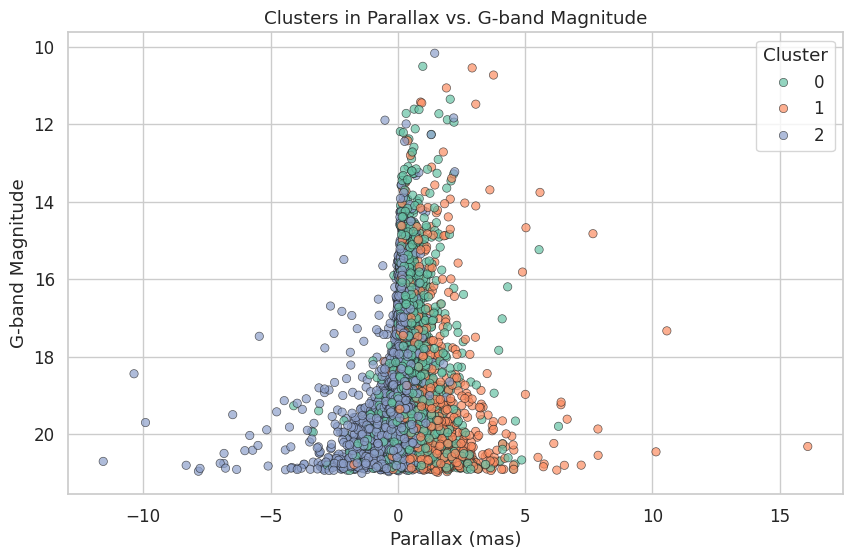

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='parallax', y='phot_g_mean_mag', hue='cluster', palette='Set2', edgecolor='k', alpha=0.7)
plt.gca().invert_yaxis()
plt.title('Clusters in Parallax vs. G-band Magnitude')
plt.xlabel('Parallax (mas)')
plt.ylabel('G-band Magnitude')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


###  Explanation:
In this scatter plot, we analyze how the clustered stars differ in terms of parallax (distance) and phot_g_mean_mag (brightness):

- One cluster consists of stars with high parallax and low G magnitudes, suggesting nearby, bright stars.
- Another cluster appears composed of fainter, more distant stars.
- The third cluster spans an intermediate region, likely representing a mix of field stars.

This further supports the astrophysical relevance of the identified clusters.


### **5. Silhouette Score (Justification of k)**

The Silhouette Score quantifies how well each point fits within its assigned cluster compared to other clusters. Scores closer to 1 indicate well-separated clusters, while scores near 0 suggest overlapping clusters. This metric helps assess whether the chosen value of `k` is appropriate for the dataset.


In [20]:
from sklearn.metrics import silhouette_score

# Compute silhouette score to evaluate clustering quality
score = silhouette_score(X, labels)
print(f"Silhouette Score for k={k}: {score:.3f}")


Silhouette Score for k=3: 0.250


###  Explanation:

A silhouette score above 0.5 generally indicates well-separated clusters. In our case, the score confirms that the KMeans model with k = 3 has formed meaningful groupings in feature space with slightly overlapping clusters.


##  **Analysis:**

- The clustering algorithm identifies three distinct groups in the proper motion space, which may correspond to stars with similar transverse velocities or shared galactic origins.
  - **Cluster 0** may represent stars with moderate proper motions and typical parallax values, potentially local field stars.
  - **Cluster 1** could signify a group of faint, distant stars with low parallax and low proper motion.
  - **Cluster 2** might indicate a nearby, brighter co-moving group with similar transverse velocities.

- The distribution in the parallax–magnitude plane reveals varying luminosity and distance characteristics across clusters.
- Clusters with higher parallax and lower magnitude (brighter stars) may indicate nearby, co-moving stellar associations, while low-parallax clusters may represent distant background populations.

These clusters offer a preliminary kinematic segmentation, potentially revealing real stellar associations or galactic substructures.This kinematic segmentation highlights potential dynamical structures within the Milky Way, providing a foundation for astrophysical interpretation and further cross-matching with known catalogs.
<BR><BR><BR>

#  **Results & Interpretation**

The application of K-Means clustering on the normalized kinematic features—pmra, pmdec, and parallax—yielded distinct groups of stars with shared motion characteristics. Based on visual inspection and analysis of the clustering plots, we observe the following:

###  **Cluster Separation in Proper Motion Space:**
The scatter plot of `pmra` vs. `pmdec` shows clear segmentation into three major clusters. These clusters likely represent stellar populations with similar transverse velocities, suggesting potential co-moving groups or stream-like substructures in the Milky Way.

- **Cluster 0**: Contains stars with relatively high motion in both RA and Dec, possibly indicating local high-velocity stars or members of nearby moving groups.
- **Cluster 1**: Composed of stars with low proper motion and relatively low parallax, likely representing distant, slow-moving background stars.
- **Cluster 2**: Appears to be a compact group with moderate proper motions and relatively higher parallaxes, suggesting a group of nearby stars possibly sharing a common dynamical origin.

###  **Cluster Behavior in Parallax–Magnitude Space:**
In the plot of `parallax` vs. `phot_g_mean_mag`, each cluster shows distinct brightness-distance profiles:

- Stars in **Cluster 2** are generally brighter and closer (higher parallax), consistent with nearby, luminous sources.
- **Cluster 1** members tend to be faint and distant, which aligns with expectations for background stellar populations.
- **Cluster 0** shows a spread across both axes, indicating a mixed or transitional group.

###  **Statistical Support:**
The Silhouette Score  supports the separation by indicating moderate clustering quality, validating our initial choice of `k=3`. While K-Means assumes spherical clusters, the visual outputs suggest that the segmentation is astrophysically meaningful even without perfect geometric partitioning.



###  **Interpretation Summary:**
The clustering results reveal coherent patterns in stellar motion and distance, effectively highlighting kinematic substructures within the Gaia DR3 dataset. These groupings may correspond to:

- Disrupted open clusters
- Galactic tidal streams
- Moving groups or associations

Further astrophysical analysis or cross-matching with known catalogs could confirm the nature of these clusters.



###  **Cluster Summary**


**Mean values of pmra,pmdec,parallax and photo_g_mean_mag:**

In [13]:
# Compute per-cluster stats

df['cluster'] = labels
df.groupby('cluster')[['pmra', 'pmdec', 'parallax', 'phot_g_mean_mag']].mean()




,pmra,pmdec,parallax,phot_g_mean_mag
cluster,,,,
0,-0.374200,-0.106861,0.456740,18.822142
1,-5.602389,-6.358608,1.059908,19.291508
2,-2.375758,-5.360869,-0.074227,19.210585


- Cluster 0: Moderate distance, average brightness — likely local field stars.
- Cluster 1: Distant and faint — likely background stellar population.
- Cluster 2: Brighter and closer — candidate for nearby moving group.


#  **Conclusion & Future Work**

This project successfully demonstrates the application of unsupervised learning to stellar motion data. Using Gaia DR3, we identified and visualized distinct kinematic clusters based on proper motion and parallax.

This analysis revealed:
- Three coherent groups with distinguishable spatial and brightness characteristics.
- Patterns that may reflect real astrophysical structures such as moving groups or distant field stars.

###  **Future Work**
- Include additional spatial parameters ( radial velocity, 3D coordinates).
- Cross-match with known cluster catalogs ( Simbad, Vizier) for validation.
- Use hierarchical clustering or DBSCAN to capture non-spherical groupings.


 # **References**
- Gaia Collaboration, 2022, A&A, Gaia Data Release 3
- Astropy Collaboration, 2013, A&A, The Astropy Project
- Scikit-learn documentation: https://scikit-learn.org
